In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [27]:
def MoG_generation_2(N=1000):
    # Dataset no.2 
    K = 5
    data_dim = 2
    # data_range = 6.0 
    w = 0.3  # strip width = 2w
    
    pi = np.ones(K) / K
    mu_list = [(1.0, 1.0), (1.0, 5.0), (3.0, 3.0), (5.0, 1.0), (5.0, 5.0)]
    mu = np.array(mu_list)
    adv_l = [(1.0, 3.0), (3.0, 1.0), (3.0, 5.0), (5.0, 3.0),
            (2.0, 2.0), (2.0, 4.0), (4.0, 2.0), (4.0, 4.0)]
    adv_sample = np.array(adv_l)
    
    samples_list = []
    while len(samples_list) < N:
        normal_sample = np.random.randn(data_dim)
        cls = np.random.randint(K)
        sample = normal_sample + mu[cls]
        if 1 - w < sample[0] < 1 + w or 5 - w < sample[0] < 5 + w or 1 - w < sample[1] < 1 + w or 5 - w < sample[1] < 5 + w:
            pass
        else:
            samples_list.append(sample)
    samples = np.array(samples_list)
    
    return pi, mu, samples, adv_sample

def MoG_generation_3(N=1000):
    # Dataset no.3 
    K = 5
    data_dim = 2
    # data_range = 6.0 
    w = 0.3  # strip width = 2w
    
    pi = np.ones(K) / K
    mu_list = [(1.0, 1.0), (1.0, 5.0), (3.0, 3.0), (5.0, 1.0), (5.0, 5.0)]
    mu = np.array(mu_list)
    adv_l = [(1.0, 3.0), (3.0, 1.0), (3.0, 5.0), (5.0, 3.0),
            (2.0, 2.0), (2.0, 4.0), (4.0, 2.0), (4.0, 4.0)]
    adv_sample = np.array(adv_l)
    
    samples_list = []
    while len(samples_list) < N:
        normal_sample = np.random.randn(data_dim)
        cls = np.random.randint(K)
        sample = normal_sample + mu[cls]
        if 3 - w < sample[0] < 3 + w or 3 - w < sample[1] < 3 + w:
            pass
        else:
            samples_list.append(sample)
    samples = np.array(samples_list)
    
    return pi, mu, samples, adv_sample

def MoG_prob(x, pi, mu, cov=None):
    K, dim = mu.shape
    if cov is None:
        cov = np.tile(np.eye(dim), (K, 1, 1))
    assert x.shape == (dim,)
    assert pi.shape == (K,)
    assert cov.shape == (K, dim, dim)
    prob = 0.0
    for k in range(K):
        s, logdet = np.linalg.slogdet(cov[k] + np.eye(dim) * 1e-3)
        # print(s, np.exp(logdet))
        assert s > 0
        log_prob_k = -dim * 0.5 * math.log(2 * math.pi) - 0.5 * logdet - 0.5 * (x - mu[k]).dot(x - mu[k])
        prob += np.exp(log_prob_k) * pi[k]
    return prob

def MoG_plot(pi, mu, cov=None):
    plt.figure(figsize=(5, 5))
    
    x1 = np.linspace(-2.0, 8.0, 101)
    x2 = np.linspace(-2.0, 8.0, 101)
    p_lists = []
    for _x2 in x2:
        p = []
        for _x1 in x1:
            p.append(MoG_prob(np.array((_x1, _x2)), pi, mu, cov) )
        p_lists.append(p)
    P = np.array(p_lists)
    
    plt.imshow(P, origin='lower', interpolation='bilinear')
    plt.xticks(np.linspace(0, 100, 6), np.linspace(-2, 8, 6))
    plt.yticks(np.linspace(0, 100, 6), np.linspace(-2, 8, 6))

def Data_plot(samples, adv_sample):
    plt.figure(figsize=(5, 5))

    x1 = [x[0] for x in samples]
    x2 = [x[1] for x in samples]
    plt.scatter(x1, x2, s=5, marker='o')
    
    x1 = [x[0] for x in adv_sample]
    x2 = [x[1] for x in adv_sample]
    plt.scatter(x1, x2, s=30, marker='X')
    
    plt.xlim(-2, 8)
    plt.ylim(-2, 8)

In [38]:
pi, mu, samples, adv_sample = MoG_generation_2()

In [29]:
pi

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [30]:
mu

array([[1., 1.],
       [1., 5.],
       [3., 3.],
       [5., 1.],
       [5., 5.]])

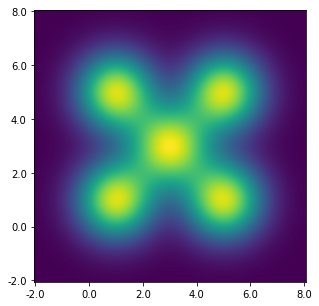

In [40]:
MoG_plot(pi, mu)
plt.savefig('figures/multi-adv-2/True.png')
plt.show()

In [41]:
samples[:20]

array([[ 6.04230174,  4.07462624],
       [ 0.64224491,  0.09572614],
       [ 5.68934447,  1.6438823 ],
       [ 2.64243126,  3.71460564],
       [ 3.06670536,  4.4510741 ],
       [ 5.63780235, -0.45553471],
       [ 6.30867825,  4.11164659],
       [ 0.21291513,  1.7882959 ],
       [ 0.51634607,  1.33987205],
       [ 3.20002079,  2.6107578 ],
       [-0.73762297,  3.50700124],
       [ 5.85498297, -0.36724158],
       [ 3.31299063,  1.35614226],
       [ 4.65428389,  5.76068136],
       [ 5.67110819,  0.48792541],
       [ 1.75126726,  1.34116332],
       [ 3.62103715,  2.45571145],
       [ 3.53247749,  2.83396372],
       [ 2.18787387,  3.79105769],
       [ 4.61478973,  1.47551456]])

In [42]:
adv_sample

array([[1., 3.],
       [3., 1.],
       [3., 5.],
       [5., 3.],
       [2., 2.],
       [2., 4.],
       [4., 2.],
       [4., 4.]])

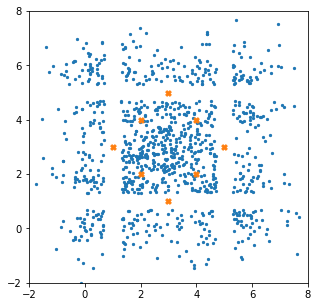

In [43]:
Data_plot(samples, adv_sample)
plt.savefig('figures/multi-adv-2/Dataset.png')
plt.show()

In [44]:
data_fname = 'datasets/multi-adv-2/data_multi_adv_1000.npz'
np.savez(data_fname, pi=pi, mu=mu, samples=samples, adv_sample=adv_sample)

## ------

In [ ]:
data_fname = 'data_multi_adv.npz'
load_data = np.load(data_fname)
true_pi = load_data['pi']
true_mu = load_data['mu']
samples_100 = load_data['samples']
adv_sample = load_data['adv_sample']

In [ ]:
MoG_plot(true_pi,true_mu)

In [ ]:
len(samples)

In [ ]:
K=5
data_dim=2
data_range=6.0
data_n=100
samples_list = []

while len(samples_list) < 1000:
    normal_sample = np.random.randn(data_dim)
    cls = np.random.randint(K)
    sample = normal_sample + true_mu[cls]
    if -.5 < sample[0] < 6.5 and -.5 < sample[1] < 6.5:
        samples_list.append(sample)
samples = np.array(samples_list)

In [ ]:
Data_plot(samples_100, adv_sample)
plt.savefig('figures/Dataset-100.png')
plt.show()

In [ ]:
adv_sample= [(0, 3), (3, 0), (3, 6), (6, 3)]

In [ ]:
Data_plot(samples, adv_sample)
plt.savefig('figures/Dataset-1000.png')
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2) 

gmm.weights_ = pi
gmm.means_ = mu
gmm.covariances_ = np.array([np.eye(2)] * 5)